<a href="https://colab.research.google.com/github/giuliovv/tfest/blob/main/examples/tfest_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install tfest

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# import os
# os.chdir("..")
import tfest

from scipy import signal

In [3]:
s1 = signal.lti([1], [1, 1])

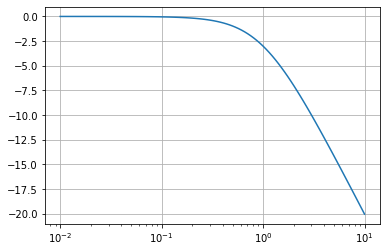

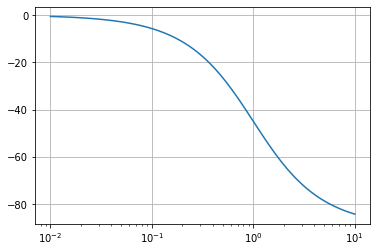

In [4]:
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()

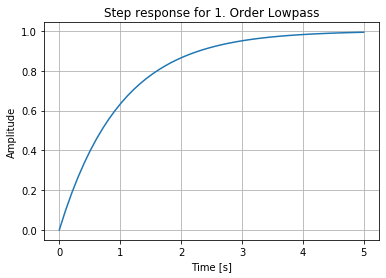

In [5]:
time = 5
t = np.linspace(0, time, num=50)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [6]:
te = tfest.tfest(u, y)

In [23]:
te.estimate(nzeros=2, npoles=3, method="h1", time=time, options={'xatol': 1e-4, 'disp': True}, l=0.1)

Optimization terminated successfully.
         Current function value: 177248770054.283600
         Iterations: 276
         Function evaluations: 476


 final_simplex: (array([[1.74036692, 1.29764568, 0.41206961, 0.49820949, 1.59305992,
        0.44928952, 0.36293673],
       [1.74036089, 1.29764382, 0.41213931, 0.49823177, 1.59302286,
        0.44932035, 0.36294302],
       [1.74036574, 1.29764495, 0.4121167 , 0.49822291, 1.5930351 ,
        0.44930897, 0.36294117],
       [1.74036854, 1.29764603, 0.41206087, 0.49820646, 1.59306412,
        0.44928577, 0.36293618],
       [1.7403675 , 1.29764526, 0.4120972 , 0.49821668, 1.5930454 ,
        0.44930074, 0.36293904],
       [1.74036659, 1.2976447 , 0.41212248, 0.49822342, 1.59303262,
        0.44931254, 0.3629407 ],
       [1.74036771, 1.29764503, 0.41211408, 0.49822027, 1.59303742,
        0.44930887, 0.3629396 ],
       [1.74036845, 1.29764528, 0.412115  , 0.49822068, 1.59303614,
        0.44930885, 0.36294039]]), array([1.7724877e+11, 1.7724877e+11, 1.7724877e+11, 1.7724877e+11,
       1.7724877e+11, 1.7724877e+11, 1.7724877e+11, 1.7724877e+11]))
           fun: 177248770054.2836
   

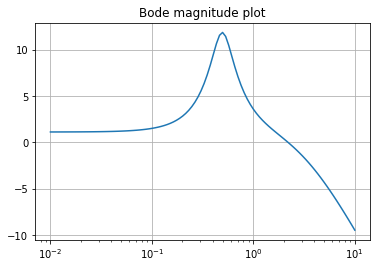

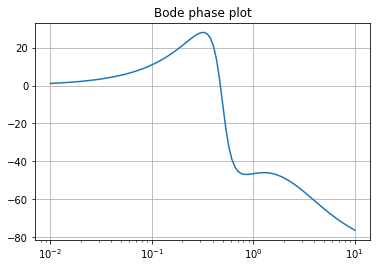

In [24]:
te.plot_bode()

In [25]:
te.get_transfer_function()

TransferFunctionContinuous(
array([3.49324322, 2.60461856, 0.82710109]),
array([1.        , 3.19757042, 0.90180844, 0.72848218]),
dt: None
)

/home/giulio/prog/.virtualenv/ML/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


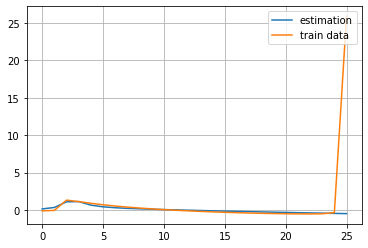

In [10]:
te.plot()